In [64]:
library(party)
library(randomForest)
library(caret)
library(readr)
library(dplyr)
# library(tictoc)

In [65]:
df = as.data.frame(read_csv('credit_train.csv'))
str(df)
# Str() is a power function that gives a more complete overview of the the language

Parsed with column specification:
cols(
  `Loan ID` = col_character(),
  `Customer ID` = col_character(),
  `Loan Status` = col_character(),
  `Current Loan Amount` = col_integer(),
  Term = col_character(),
  `Credit Score` = col_integer(),
  `Annual Income` = col_integer(),
  `Years in current job` = col_character(),
  `Home Ownership` = col_character(),
  Purpose = col_character(),
  `Monthly Debt` = col_double(),
  `Years of Credit History` = col_double(),
  `Months since last delinquent` = col_integer(),
  `Number of Open Accounts` = col_integer(),
  `Number of Credit Problems` = col_integer(),
  `Current Credit Balance` = col_integer(),
  `Maximum Open Credit` = col_integer(),
  Bankruptcies = col_integer(),
  `Tax Liens` = col_integer()
)


'data.frame':	100514 obs. of  19 variables:
 $ Loan ID                     : chr  "14dd8831-6af5-400b-83ec-68e61888a048" "4771cc26-131a-45db-b5aa-537ea4ba5342" "4eed4e6a-aa2f-4c91-8651-ce984ee8fb26" "77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a" ...
 $ Customer ID                 : chr  "981165ec-3274-42f5-a3b4-d104041a9ca9" "2de017a3-2e01-49cb-a581-08169e83be29" "5efb2b2b-bf11-4dfd-a572-3761a2694725" "e777faab-98ae-45af-9a86-7ce5b33b1011" ...
 $ Loan Status                 : chr  "Fully Paid" "Fully Paid" "Fully Paid" "Fully Paid" ...
 $ Current Loan Amount         : int  445412 262328 99999999 347666 176220 206602 217646 648714 548746 215952 ...
 $ Term                        : chr  "Short Term" "Short Term" "Short Term" "Long Term" ...
 $ Credit Score                : int  709 NA 741 721 NA 7290 730 NA 678 739 ...
 $ Annual Income               : int  1167493 NA 2231892 806949 NA 896857 1184194 NA 2559110 1454735 ...
 $ Years in current job        : chr  "8 years" "10+ years" "8 years" "3 y

In [66]:
# Remove NaN values - dropping those row
df <- na.omit(df)

In [67]:
summary(df)

   Loan ID          Customer ID        Loan Status        Current Loan Amount
 Length:38010       Length:38010       Length:38010       Min.   :   21450   
 Class :character   Class :character   Class :character   1st Qu.:  185972   
 Mode  :character   Mode  :character   Mode  :character   Median :  322872   
                                                          Mean   :13699292   
                                                          3rd Qu.:  539792   
                                                          Max.   :99999999   
     Term            Credit Score  Annual Income      Years in current job
 Length:38010       Min.   : 585   Min.   :  111245   Length:38010        
 Class :character   1st Qu.: 702   1st Qu.:  914209   Class :character    
 Mode  :character   Median : 721   Median : 1245754   Mode  :character    
                    Mean   :1061   Mean   : 1444221                       
                    3rd Qu.: 738   3rd Qu.: 1725604                       
    

In [68]:
df <- select(df,-`Loan ID`,-`Customer ID`) 

In [69]:
# Select only categorical fields/columns 
catg_df = select_if(df,is.character)

# One hot code all categorical values 
dummy <- dummyVars("~ .", data = catg_df,fullRank = TRUE, sep=".")
dummy_df <- as.data.frame(predict(dummy, df))

In [70]:
dim(dummy_df)

[1] 38010    31

In [71]:
# Merge dummy_df back into dummy, while dropping the old categorical variables\
df <- select_if(df,Negate(is.character))
df_new <- cbind(df,dummy_df)

In [72]:
head(df_new,2)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purposemajor_purchase,PurposeMedical Bills,Purposemoving,Purposeother,PurposeOther,Purposerenewable_energy,Purposesmall_business,PurposeTake a Trip,Purposevacation,Purposewedding
3,99999999,741,2231892,29200.53,14.9,29,18,1,297996,750090,...,0,0,0,0,0,0,0,0,0,0
7,217646,730,1184194,10855.08,19.6,10,13,1,122170,272052,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# colnames(df_new)

In [74]:
colnames(df_new) <- gsub("`", "", colnames(df_new))
colnames(df_new) <- gsub(" ", ".", colnames(df_new))
# # In R, use \\ to grab special character

In [75]:
# length(colnames(df_new))
colnames(df_new)

[1] "Current.Loan.Amount"           "Credit.Score"                 
 [3] "Annual.Income"                 "Monthly.Debt"                 
 [5] "Years.of.Credit.History"       "Months.since.last.delinquent" 
 [7] "Number.of.Open.Accounts"       "Number.of.Credit.Problems"    
 [9] "Current.Credit.Balance"        "Maximum.Open.Credit"          
[11] "Bankruptcies"                  "Tax.Liens"                    
[13] "Loan.StatusFully.Paid"         "TermShort.Term"               
[15] "Years.in.current.job1.year"    "Years.in.current.job10+.years"
[17] "Years.in.current.job2.years"   "Years.in.current.job3.years"  
[19] "Years.in.current.job4.years"   "Years.in.current.job5.years"  
[21] "Years.in.current.job6.years"   "Years.in.current.job7.years"  
[23] "Years.in.current.job8.years"   "Years.in.current.job9.years"  
[25] "Years.in.current.jobn/a"       "Home.OwnershipHome.Mortgage"  
[27] "Home.OwnershipOwn.Home"        "Home.OwnershipRent"           
[29] "PurposeBuy.a.Car"              "PurposeBuy.House"             
[31] "PurposeDebt.Consolidation"     "PurposeEducational.Expenses"  
[33] "PurposeHome.Improvements"      "Purposemajor_purchase"        
[35] "PurposeMedical.Bills"          "Purposemoving"                
[37] "Purposeother"                  "PurposeOther"                 
[39] "Purposerenewable_energy"       "Purposesmall_business"        
[41] "PurposeTake.a.Trip"            "Purposevacation"              
[43] "Purposewedding"

**Key distinction:**

'Loan.StatusFully.Paid' is automatically kept as the one field.

R's dummyVars has removed the 'ChargedOff' option (the negative) from the model.

With Python, one must remove the ChargedOff as it can mess with the model. 

In [76]:
set.seed(100)
train <- sample(nrow(df_new), 0.75*nrow(df_new), replace = FALSE)
TrainSet <- df_new[train,]
TestSet <- df_new[-train,]

In [77]:
# cat('Training Set Shape:', dim(TrainSet),"\n")
# cat('Testing Set Shape:',dim(TestSet))

In [78]:
train_labels <- as.factor(TrainSet$Loan.StatusFully.Paid)
train_features <- select(TrainSet, -Loan.StatusFully.Paid)

In [79]:
test_labels <- as.factor(TestSet$Loan.StatusFully.Paid)
test_features <- select(TestSet, -Loan.StatusFully.Paid)

In [80]:
random_forest = rf <- randomForest(train_features,train_labels, ntree=200, importance=TRUE)


In [81]:
print(rf)


Call:
 randomForest(x = train_features, y = train_labels, ntree = 200,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 6

        OOB estimate of  error rate: 15.26%
Confusion matrix:
     0     1 class.error
0 1623  4298 0.725890897
1   53 22533 0.002346586


In [82]:
# plot(rf)
# # Have to find a way to do this in Python

In [83]:
# Predicting on train set
predTrain <- predict(rf, TrainSet, type = "class")
# Checking classification accuracy
table(predTrain, TrainSet$Loan.StatusFully.Paid)  

         
predTrain     0     1
        0  5862     0
        1    59 22586

In [84]:
# Checking classification accuracy
predValid <- predict(rf, test_features, type = "class")
print("The accuracy is: ")
mean(predValid == test_labels)                
table(predValid,test_labels)

[1] "The accuracy is: "


[1] 0.8468905

         test_labels
predValid    0    1
        0  523    8
        1 1447 7525

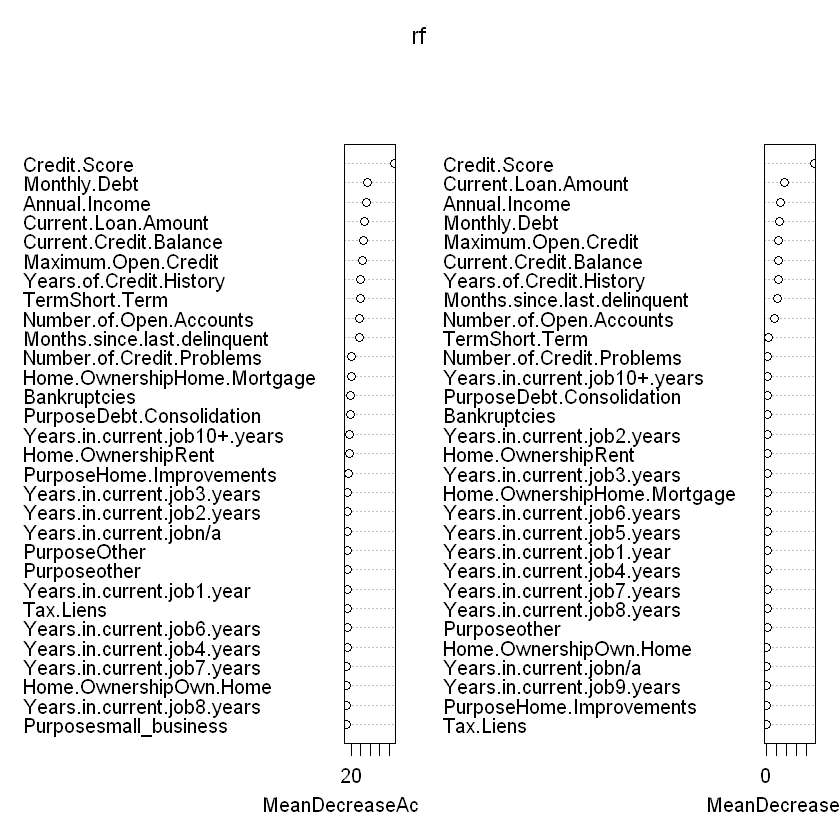

In [85]:
# importance(rf)  
varImpPlot(rf)